# Практическое занятие 3
# Компьютерный практикум по алгебре на Python
## Решение систем линейных алгебраических уравнений (СЛАУ)

https://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve

In [2]:
import sympy
from sympy import linsolve, Matrix, S, Symbol, symbols, Eq,\
linear_eq_to_matrix, simplify

### Задание 1.
Решить СЛАУ, представив их тремя различными способами (расширенная матрица, список уравнений, матричный вид)
$$
a)\ \left\{
\begin{matrix}
-x+5y-3z=8\\
4x-y+5z=-1\\
3x+4y+5z=10
\end{matrix}
\right., \quad
b)\ \left\{
\begin{matrix}
-x+5y-3z=8\\
4x-y+5z=-1\\
3x+4y+2z=7
\end{matrix}
\right., \quad
c)\ \left\{
\begin{matrix}
-x+5y-3z=8\\
4x-y+5z=-1\\
3x+4y+2z=5
\end{matrix}
\right.
$$

In [13]:
print("СЛАУ 1")
system1 = Matrix([[-1, 5, -3, 8],
                  [4, -1, 5, -1],
                  [3, 4, 5, 10]])
display(*linsolve(system1))

print("\nСЛАУ 2")
x, y, z = symbols('x y z')
system2 = [-1 * x + 5 * y - 3 * z - 8,
           4 * x - y + 5 * z + 1,
           3 * x + 4 * y + 2 * z - 7]
display(*linsolve(system2, x, y, z))

print("\nСЛАУ 3")
system3A = Matrix([[-1, 5, -3],
                   [4, -1, 5],
                   [3, 4, 2]])
system3b = Matrix([8, -1, 5])
display(linsolve((system3A, system3b)))

СЛАУ 1


(-1, 2, 1)


СЛАУ 2


(3/19 - 22*z/19, 7*z/19 + 31/19, z)


СЛАУ 3


EmptySet

### Задание 2.

Решить СЛАУ с параметром $a$, представив их списком уравнений, а затем приведя к матричному виду с помощью linear_eq_to_matrix
$$
a)\ \left\{
\begin{matrix}
ax+5y-3z=8\\
4x-y+5z=-1\\
3x+4y+5z=10
\end{matrix}
\right., \quad
b)\ \left\{
\begin{matrix}
(a-1)x+5y-3z=8\\
(4+a)x-y+5z=-1\\
(3+2a)x+4y+2z=7
\end{matrix}
\right., \quad
c) \left\{
\begin{matrix}
-x+5y-3z=8a\\
4x-y+5z=-a\\
3x+4y+2z=5a
\end{matrix}
\right.
$$
Решить СЛАУ а) при $a=-82/25$, b) при $a=-19/6$, $-3.17$ и $-3.167$, c) при $a=1$.

Проанализировать результаты. Для каждого случая (кроме случая несовместной СЛАУ) провести проверку подстановкой.

При подстановке дробей пользоваться конструкцией вида $S(num)/den$, например,
$S(2)/3$

In [41]:
a = Symbol('a')
x, y, z = symbols('x y z')
A, Ar = linear_eq_to_matrix([Eq(a * x + 5 * y - 3 * z, 8),
                            Eq(4 * x - y + 5 * z, -1),
                            Eq(3 * x + 4 * y + 5 * z, 10)],
                            [x, y, z])

B, Br = linear_eq_to_matrix([Eq((a - 1) * x + 5 * y - 3 * z, 8),
                            Eq((4 + a) * x - y + 5 * z, -1),
                            Eq((3 + 2 * a) * x + 4 * y + 2 * z, 7)],
                            [x, y, z])

C, Cr = linear_eq_to_matrix([Eq(-x + 5 * y - 3 * z, 8 * a),
                            Eq(4 * x - y + 5 * z, -a),
                            Eq(3 * x + 4 * y + 2 * z, 5 * a)],
                            [x, y, z])

A = A.subs(a, S(-82) / 25)
resA = Matrix(*linsolve((A, Ar)))
print("СЛАУ А)")
display(resA)
# Проверки нет, так как нет решений.
print()

for i in (S(-19) / 6,  S(-317) / 100, S(-3167)/ 1000):
  newB = B.subs(a, i)
  #resB = Matrix(*(linsolve((newB, Br))))
  resB = Matrix(simplify(*linsolve((newB, Br))))
  print("СЛАУ B)")
  display(resB)
  display(simplify(simplify(newB * resB) == Br))
  print()

C = C.subs(a, 1)
resC = Matrix(*linsolve((C, Cr)))
print("СЛАУ C)")
display(resC)
# Проверки нет, так как нет решений.

СЛАУ А)


Matrix(0, 0, [])


СЛАУ B)


Matrix([
[6*tau0/5 - 111/55],
[             tau0],
[             3/22]])

True


СЛАУ B)


Matrix([
[ 1100*tau0 - 150],
[918*tau0 - 247/2],
[            tau0]])

True


СЛАУ B)


Matrix([
[ 11000*tau0 - 1500],
[9168*tau0 - 2497/2],
[              tau0]])

True


СЛАУ C)


Matrix(0, 0, [])

### Задание 3
В расширенной матрице СЛАУ из Задания 1 а)

1) выделить матрицу левой части

2) выделить столбец правой части

3) транспонировать матрицу, полученную в 1)

4) получить расширенную матрицу из матрицы 3) и столбца 2)

5) создать на основе лямбда-функции матрицу $3\times 4$ из расположенных в шахматном порядке чисел 1 и $-1$.

In [19]:
system = [-1 * x + 5 * y - 3 * z - 8,
          4 * x - 1 * y + 5 * z + 1,
          3 * x + 4 * y + 5 * z - 10]
res1, res2 = linear_eq_to_matrix(system, x, y, z)
display(res1)
print()
display(res2)
print()
display(res1.T)
print()
display(res1.T.row_join(res2))
print()
res5 = Matrix(3, 4, lambda i, j: (-1) ** (i + j))
display(res5)

Matrix([
[-1,  5, -3],
[ 4, -1,  5],
[ 3,  4,  5]])

Matrix([
[ 8],
[-1],
[10]])

Matrix([
[-1,  4, 3],
[ 5, -1, 4],
[-3,  5, 5]])

Matrix([
[-1,  4, 3,  8],
[ 5, -1, 4, -1],
[-3,  5, 5, 10]])

Matrix([
[ 1, -1,  1, -1],
[-1,  1, -1,  1],
[ 1, -1,  1, -1]])

### Индивидуальное задание.
Решить СЛАУ c параметром тремя способами. Вначале составить список уравнений и решить вторым способом, затем список уравнений преобразовать в матричный вид и решить третьим способом. Затем составить из матрицы левой части и столбца правой расширенную матрицу СЛАУ и решить первым способом. После этого провести проверку подстановкой.

Затем отдельно рассмотреть значение параметра, при котором решение СЛАУ нельзя получить по общей формуле, полученной ранее.
Найти решение СЛАУ при этом значении параметра первым или третьим способом, используя подстановку subs.

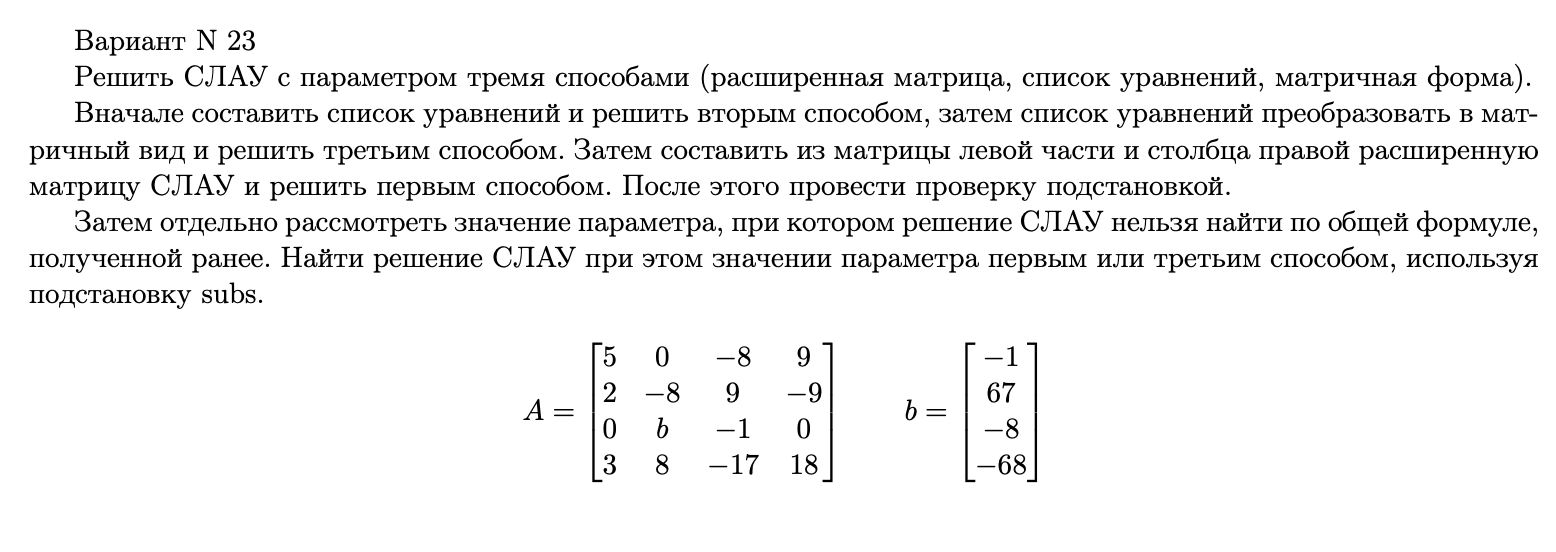

In [50]:
x, y, w, z = symbols('x y w z')
b = Symbol('b')

A = [Eq(5 * x + 0 * y - 8 * z + 9 * w, -1),
     Eq(2 * x - 8 * y + 9 * z - 9 * w, 67),
     Eq(0 * x + b * y - 1 * z, -8),
     Eq(3 * x + 8 * y - 17 * z + 18 * w, -68)]

# Второе решение (через уравнения)
res2 = linsolve(A, x, y, z, w)
display(*res2 if len(res2) != 0 else "Нет решений")
print()

# Третье решение (матричным видом).
left, right = linear_eq_to_matrix(A, x, y, z, w)
res3 = linsolve((left, right))
display(*res3 if len(res3) != 0 else "Нет решений")
print()

# Первое решение (через расширенную матрицу).
C = left.col_insert(4, right)
res1 = linsolve(C)
display(*res1 if len(res1) != 0 else "Нет решений")

# Проверка.
display(simplify(left * Matrix(*res1) - right).T)

# При b = 40 / 61 нельзя решить по общей формуле.
left = left.subs(b, 40 / 61)
display(simplify(left * Matrix(*res1) - right))

(w*(72 - 9*b)/(61*b - 40) + (527*b - 504)/(61*b - 40), 63*w/(61*b - 40) - 151/(61*b - 40), 63*b*w/(61*b - 40) + (337*b - 320)/(61*b - 40), w)

(tau0*(72 - 9*b)/(61*b - 40) + (527*b - 504)/(61*b - 40), 63*tau0/(61*b - 40) - 151/(61*b - 40), 63*b*tau0/(61*b - 40) + (337*b - 320)/(61*b - 40), tau0)

(tau0*(72 - 9*b)/(61*b - 40) + (527*b - 504)/(61*b - 40), 63*tau0/(61*b - 40) - 151/(61*b - 40), 63*b*tau0/(61*b - 40) + (337*b - 320)/(61*b - 40), tau0)

Matrix([[0, 0, 0, 0]])

Matrix([
[                                                                          0],
[                                                                          0],
[(-63*b*tau0 + 151*b + 41.3114754098361*tau0 - 99.0163934426229)/(61*b - 40)],
[                                                                          0]])